# Section 1 - Introduction

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv("data.csv", engine = 'python', encoding = 'latin-1')

# Section 2 - Understanding the Dataset

In [211]:
df.shape

(9576, 10)

In [212]:
df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.3+ KB


In [214]:
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [215]:
df.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [ ]:
df.describe()

# Section 3 - Data Cleaning

df.duplicated().sum()

In [218]:
df.drop_duplicates(inplace=True)
print(f"New number of duplicates: {df.duplicated().sum()}\nModified size of dataset: {df.shape}")

New number of duplicates: 0
Modified size of dataset: (9463, 10)


In [219]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [220]:
zero_counts = pd.Series({
    col: ((df[col] == 0) | (df[col] == "Other")).sum() for col in df.columns
})
print(zero_counts)

car               0
price           240
body              0
mileage         310
engV              0
engType         462
registration      0
year              0
model             0
drive             0
dtype: int64


In [221]:
df.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)
df.isnull().sum()

car               0
price           240
body              0
mileage         310
engV            434
engType         462
registration      0
year              0
model             0
drive           510
dtype: int64

In [222]:
def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median()
    elif df.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = df.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median
    else:
        return df['price'].median()
    
price_median = df.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_med'}, inplace=True)
price_median.head()

,car,model,price_med
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [223]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_med'].values[0]
    else:
        return x['price']
    
df['price'] = df.apply(fill_with_median, axis=1)

In [224]:
def get_median_engV(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median()
    elif df.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = df.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median
    else:
        return df['price'].median()
    
engV_median = df.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_med'}, inplace=True)
engV_median.head()

,car,model,engV_med
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [225]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car'] == x['car']) & (engV_median['model'] == x['model'])]['engV_med'].values[0]
    else:
        return x['engV']
    
df['engV'] = df.apply(fill_with_median, axis=1)

In [226]:
def get_median_mileage(x):
    car = x.name[0]
    model = x.name[1]
    if x.count() > 0:
        return x.median()
    elif df.groupby(['car', 'model'])['mileage'].count()[(car, model)] > 0:
        model_median = df.groupby(['car', 'model'])['mileage'].apply(lambda x: x.median())[(car, model)]
        return model_median
    elif df.groupby(['car'])['mileage'].count()[car] > 0:
        car_median = df.groupby(['car'])['mileage'].apply(lambda x: x.median())[car]
        return car_median
    else:
        return df['mileage'].median()

mileage_median = df.groupby(['car', 'model', 'year'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_med'}, inplace=True)
mileage_median.head()

,car,model,year,mileage_med
0,Acura,MDX,2005,199.0
1,Acura,MDX,2008,85.0
2,Acura,MDX,2014,30.0
3,Acura,RL,2006,126.0
4,Acura,RL,2008,150.0


In [227]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
df['mileage'] = df.apply(fill_with_median, axis=1)

In [228]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()
    elif df.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = df.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode
    else:
        return df['drive'].mode()
    
drive_modes = df.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [229]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
df['drive'] = df.apply(fill_with_mode, axis=1)

In [230]:
def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()
    elif df.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = df.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode
    else:
        return df['engType'].mode()
    
engType_modes = df.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

,car,model,engType_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas
2,Acura,TL,Gas
3,Acura,TLX,Petrol
4,Acura,ZDX,Petrol


In [231]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
df['engType'] = df.apply(fill_with_mode, axis=1)

In [232]:
df.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [290]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df_cleaned = remove_outliers(df, 'mileage')
df = remove_outliers(df_cleaned, 'engV')

# Section 4 - Univariate Data Analysis

In [288]:
numerical_data = ['price', 'mileage', 'engV', 'year']
categorical_data = ['car', 'body', 'engType', 'registration', 'model', 'drive']

In [291]:
df.describe()

,price,mileage,engV,year
count,8415.00000,8415.000000,8415.000000,8415.000000
mean,13294.53587,139.410992,1.983882,2006.596197
std,15744.94721,83.423617,0.597184,7.012687
min,259.35000,1.000000,0.555000,1953.000000
25%,5200.00000,78.000000,1.600000,2004.000000
50%,8999.00000,130.000000,1.900000,2008.000000
75%,14900.00000,195.000000,2.400000,2012.000000
max,200000.00000,370.000000,3.500000,2016.000000


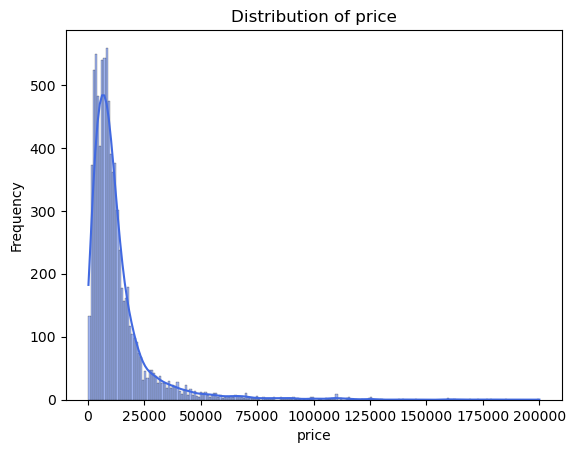

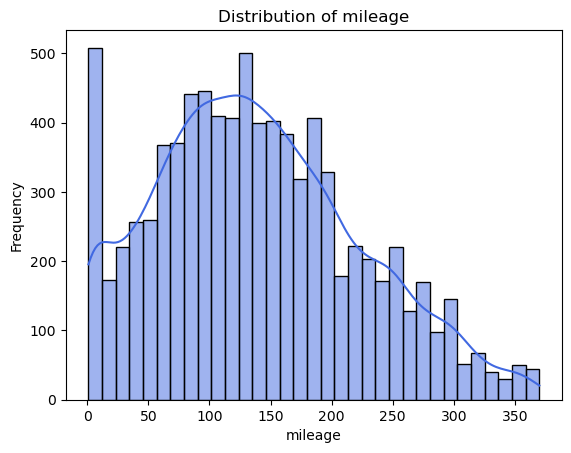

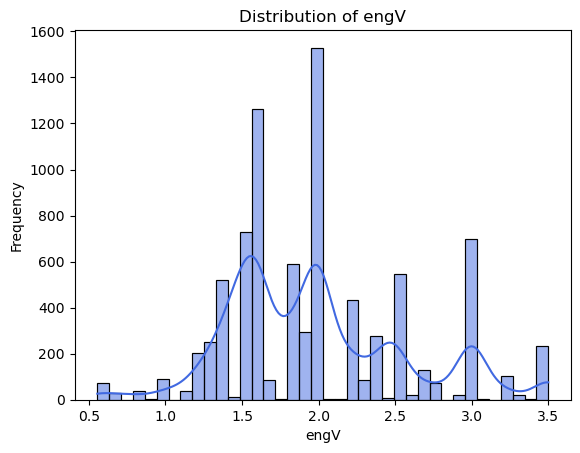

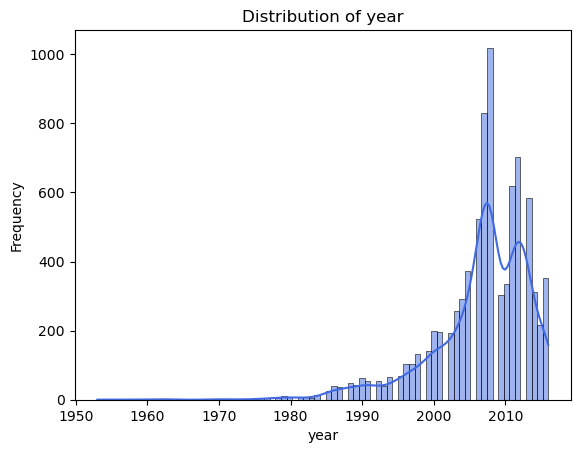

In [292]:
for col in numerical_data:
    sns.histplot(df[col], kde=True, color='royalblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

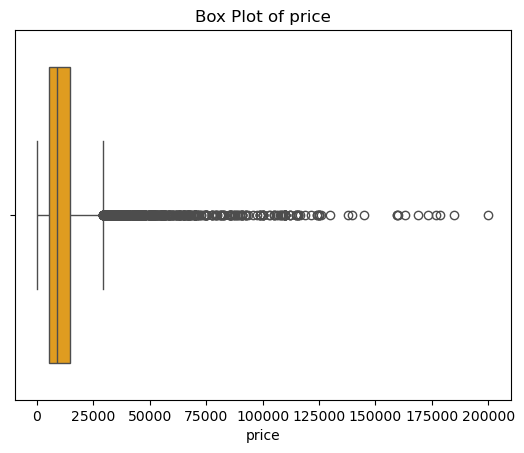

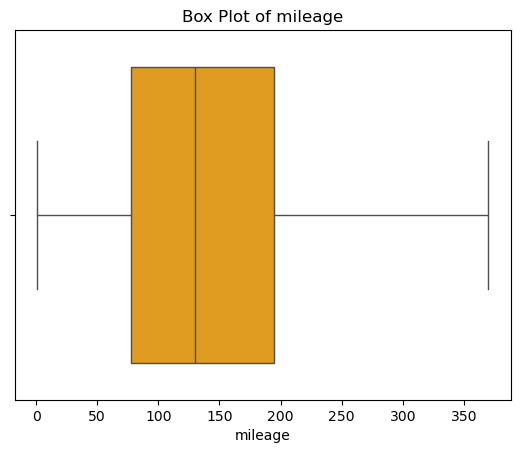

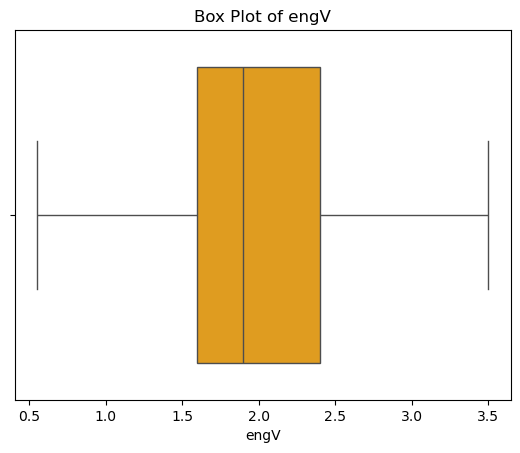

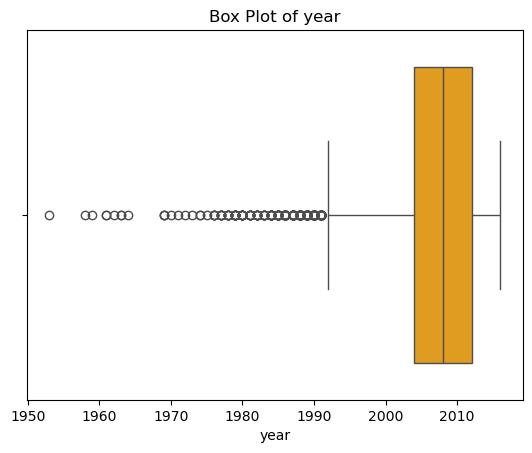

In [293]:
for col in numerical_data:
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Box Plot of {col}")
    plt.show()

In [294]:
for col in categorical_data:
    print(f"Frequency distribution for: {col}")
    print(df[col].value_counts(), '\n')

Frequency distribution for: car
car
Volkswagen       879
Mercedes-Benz    668
BMW              554
VAZ              480
Renault          454
                ... 
SMA                1
Bogdan             1
Huanghai           1
Wartburg           1
Buick              1
Name: count, Length: 74, dtype: int64 

Frequency distribution for: body
body
sedan        3300
crossover    1537
hatch        1217
van           976
vagon         694
other         691
Name: count, dtype: int64 

Frequency distribution for: engType
engType
Petrol    4068
Diesel    2835
Gas       1512
Name: count, dtype: int64 

Frequency distribution for: registration
registration
yes    7895
no      520
Name: count, dtype: int64 

Frequency distribution for: model
model
E-Class        174
A6             162
Camry          132
Lanos          126
Vito ïàññ.     118
              ... 
120              1
NX 300           1
Trooper          1
3221 GAZåëü      1
Passat B2        1
Name: count, Length: 770, dtype: int64 

Freque

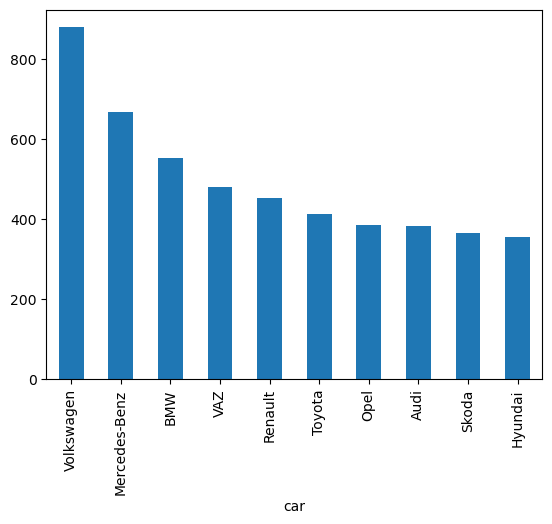

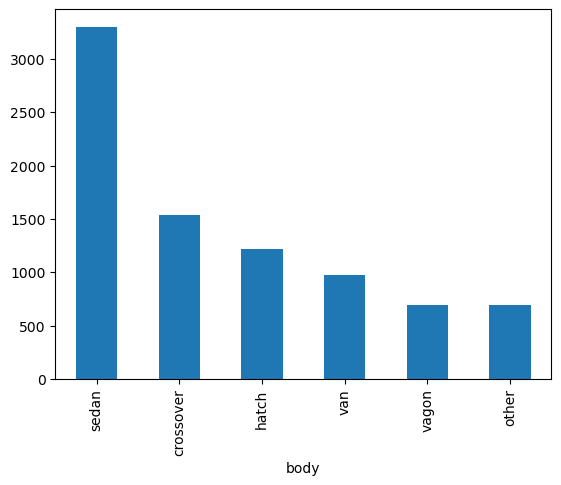

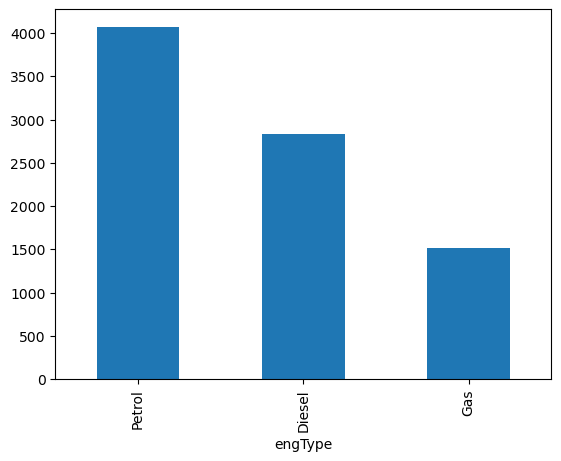

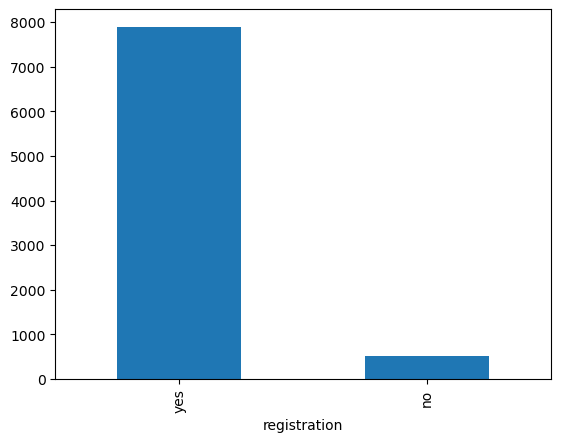

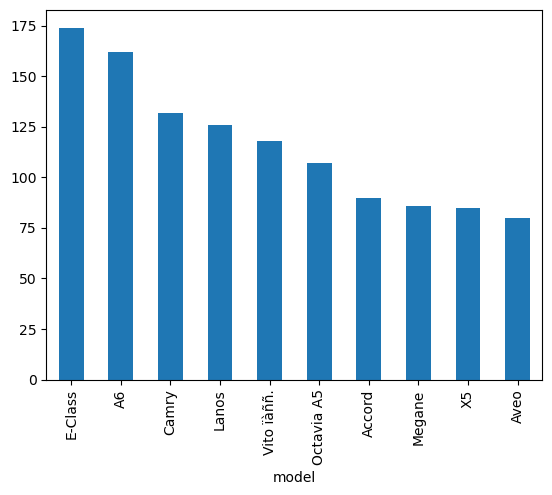

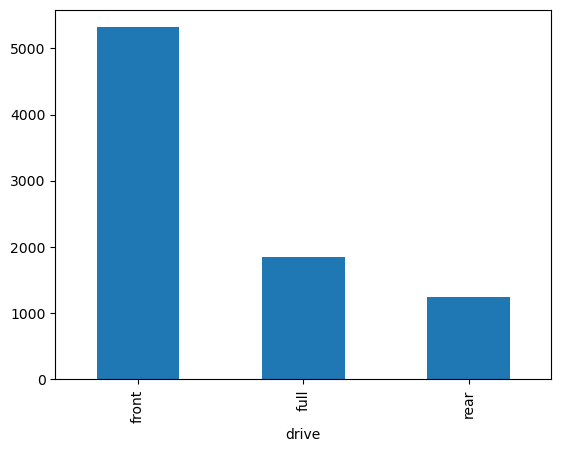

In [295]:
for col in categorical_data:
    df[col].value_counts().head(10).plot.bar()
    plt.show()

# Section 5 - Bivariate and Multivariate Analysis

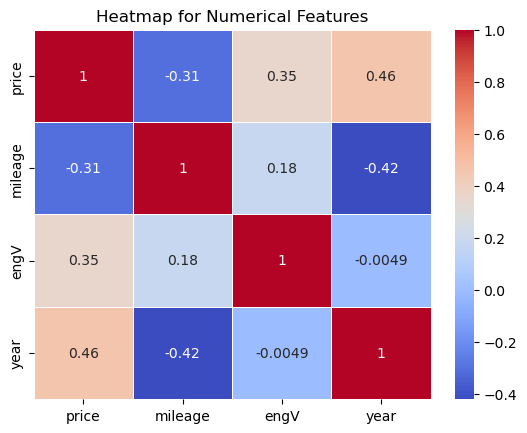

In [296]:
numerical_df = df.select_dtypes(include='number')
sns.heatmap(numerical_df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title("Heatmap for Numerical Features")
plt.show()

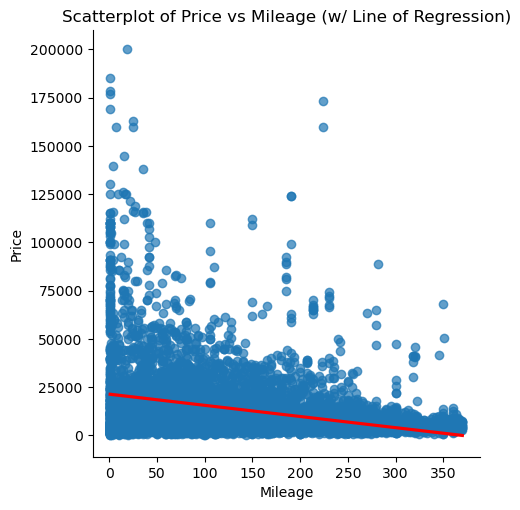

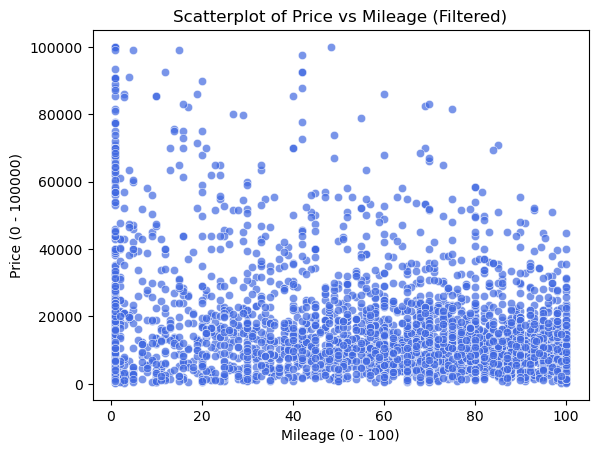

In [297]:
sns.lmplot(x='mileage', y='price', data=df, scatter_kws={'alpha': 0.7}, line_kws={'color':'red'})
plt.title('Scatterplot of Price vs Mileage (w/ Line of Regression)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

filtered_df = df[(df['mileage'] >= 0) & (df['mileage'] <= 100) & 
                 (df['price'] >= 0) & (df['price'] <= 100000)]
sns.scatterplot(x='mileage', y='price', data=filtered_df, color='royalblue', alpha=0.7)
plt.title('Scatterplot of Price vs Mileage (Filtered)')
plt.xlabel('Mileage (0 - 100)')
plt.ylabel('Price (0 - 100000)')
plt.show()

,year,registration,RegCounts
0,1953,yes,1
1,1958,yes,1
2,1959,yes,1
3,1961,yes,2
4,1962,yes,1


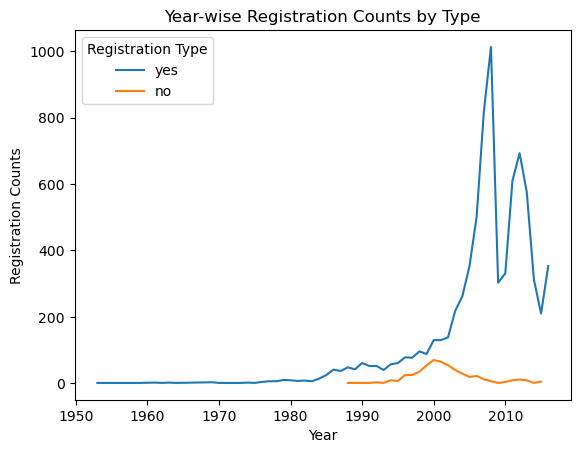

In [298]:
df_new = df.groupby(['year', 'registration']).size().reset_index(name='RegCounts')
display(df_new.head())
sns.lineplot(data=df_new, x='year', y='RegCounts', hue='registration')
plt.title("Year-wise Registration Counts by Type")
plt.xlabel("Year")
plt.ylabel("Registration Counts")
plt.legend(title="Registration Type")
plt.show()

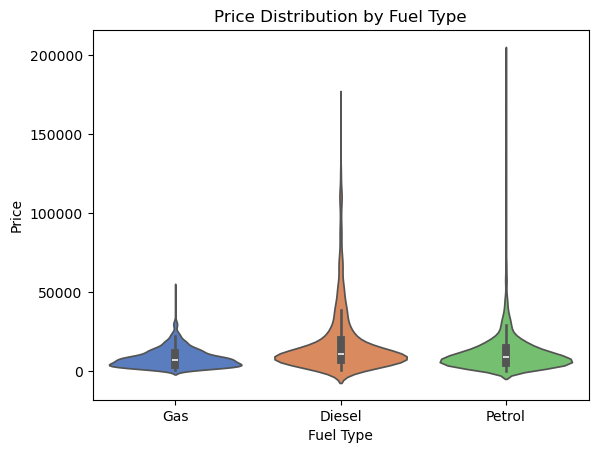

In [313]:
sns.violinplot(x='engType', y='price', data=df, hue = 'engType', palette='muted', inner='box')
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

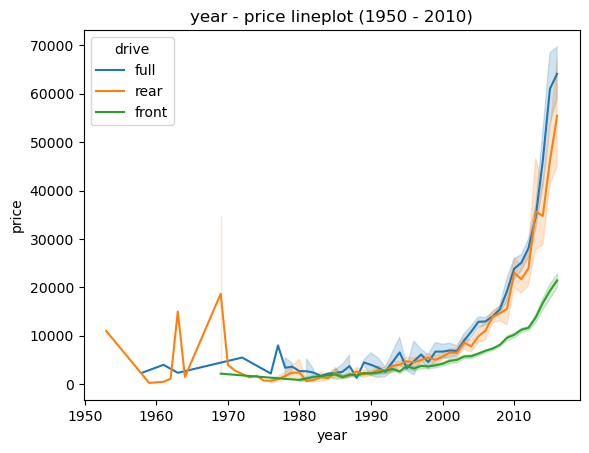

In [301]:
sns.lineplot(data=df, y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2010)")
plt.show()

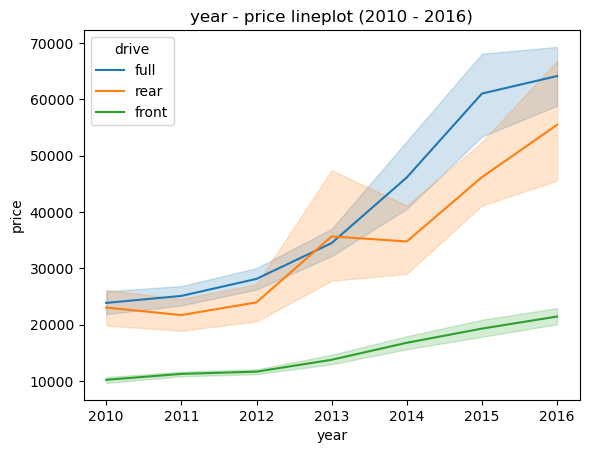

In [303]:
sns.lineplot(data=df[df.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")
plt.show()

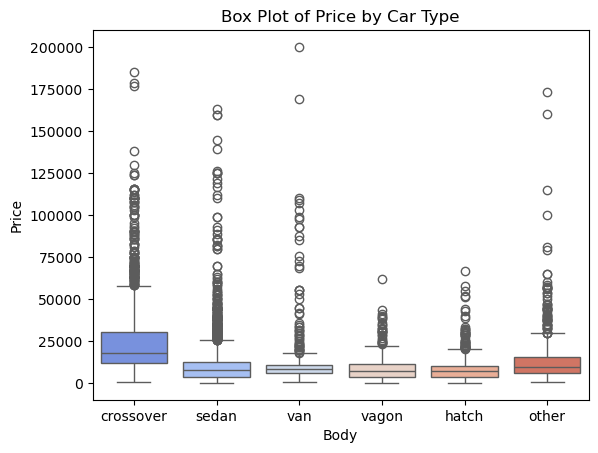

In [306]:
sns.boxplot(x='body', y='price', data=df, hue='body', palette='coolwarm')
plt.title("Box Plot of Price by Car Type")
plt.xlabel("Body")
plt.ylabel("Price")
plt.show()

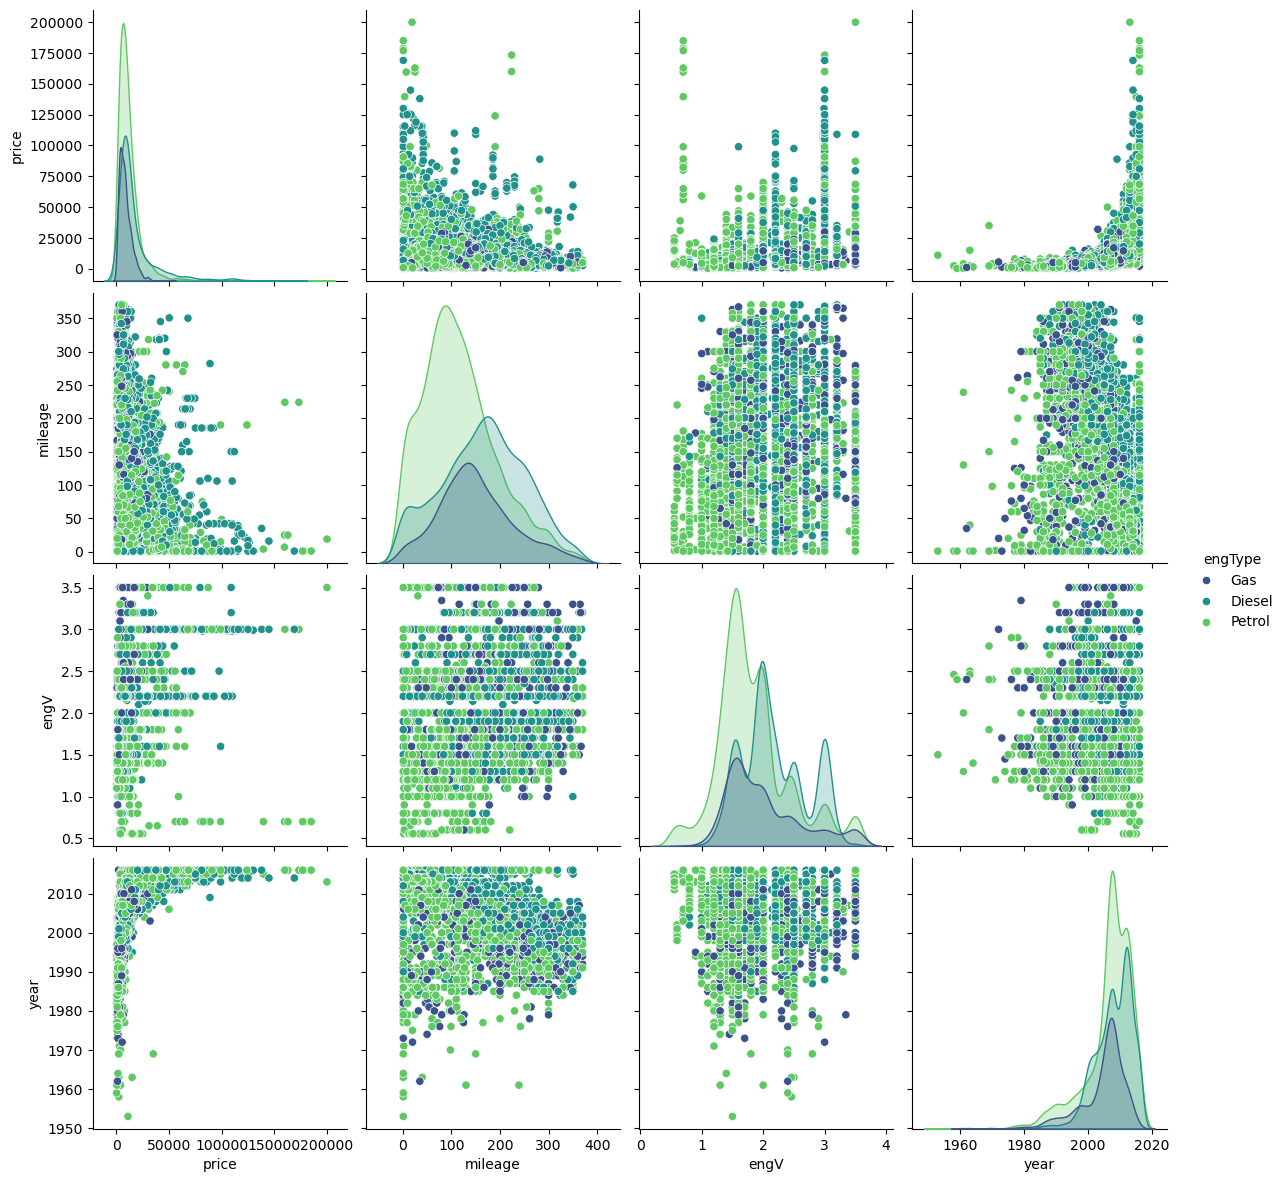

In [308]:
sns.pairplot(df, hue='engType', palette="viridis", height=3)
plt.show()

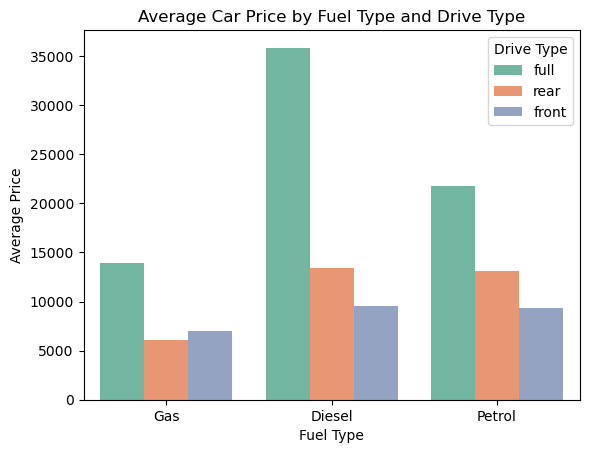

In [311]:
sns.barplot(x='engType', y='price', hue='drive', data=df, estimator='mean', errorbar=None, palette='Set2')
plt.title('Average Car Price by Fuel Type and Drive Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.legend(title='Drive Type')
plt.show()

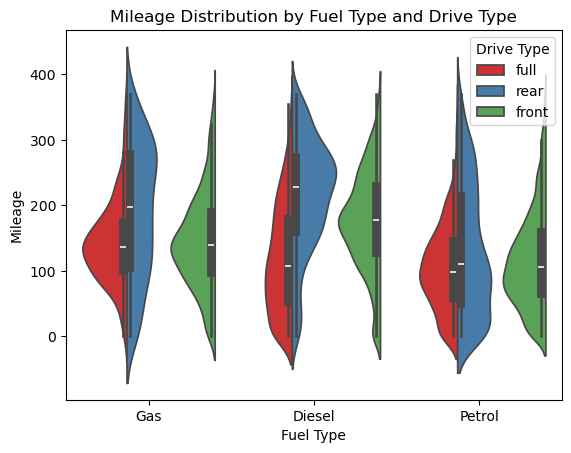

In [312]:
sns.violinplot(x='engType', y='mileage', hue='drive', data=df, split=True, palette='Set1')

plt.title('Mileage Distribution by Fuel Type and Drive Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.legend(title='Drive Type')
plt.show()